<a href="https://colab.research.google.com/github/marcocaramanti/MLPNS_MCaramanti/blob/main/MBoltzmannDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

In [4]:
from __future__ import print_function, division
'''
Questo comando garantisce la compatibilità fra Python2 e Python3
C'è incompatibilità fra le due versioni di Python (Python3 è stato un
"disruptive update")
In Python2 i print sono scritti senza parentesi
print "Hello world"
Questa libreria dà compatibilità da Python3 a Python2 e fa in modo che il codice
con le parentesi funzioni anche in Python2.
Cambia anche la divisione. In Python3 1/2 produce un float, mentre in Python2
avrebbe prodotto floor(1/2).
Questi sono i minimi import che garantiscono la compatibilità di un codice 
scritto in Python3 con un interprete Python2
'''
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/MLPNS2023/master/fbb.mplstyle")
# Serve per importare preferenze standard su come realizzare i grafici


Populating the interactive namespace from numpy and matplotlib


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions.   In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the *distribution of speed of molecules in a gas*. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, the velocity of the molecules is different for different gas temperatures. **This distribution of velocities is called the Maxwell-Boltzmann distribution.**


It turns out that the Maxwel-Boltzmann distribution is a special case of the [*Chi distribution*](https://en.wikipedia.org/wiki/Chi_distribution) with 3 degrees of freedom, and with a scale parameter corresponding to the temperature in some way. 


Below I have created 3 distributions. Based on the description above


# 1) label the axes in the plot

Text(0, 0.5, 'Number of molecules')

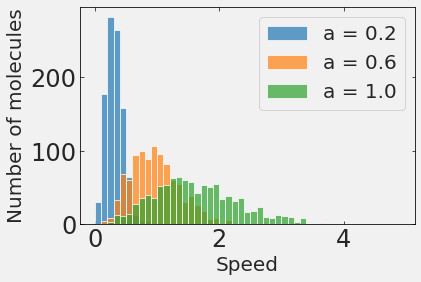

In [5]:
np.random.randn(123)
fig, ax = pl.subplots()
for a in [0.2, 0.6, 1.0]:
    ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
          bins=np.arange(0,5,0.1), alpha=0.7,
       label="a = %.1f"%a);
# Il metodo .rvs() estrae dei campioni secondo quella distribuzione di prob.

pl.legend();

# your code to add labels here
pl.xlabel("Speed")
pl.ylabel("Number of molecules")

# 2) knowing that the *scale* parameter $a$  is a function of the temperature  *T*, and that the dependency is to a power 1/2, which is correct:
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**? 

   (in other words, is the dependency on the root of the temperature or on the inverse root of the temperature ?)
 

The correct dependence is $\sqrt{T}$


# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed? 
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$

Using the scipy function ```sp.special.gamma()```  calculate the gamma $\Gamma$ function,

**calculate the mean of all three distributions. Compare it with the mean of the empirical distributions I generated in step 1. How does this mean compare to the most probable molecular speed.**

In [20]:
media_chi2 = np.sqrt(2)*sp.special.gamma((3+1)/2)/sp.special.gamma(3/2)

for a in [0.2, 0.6, 1.0]:
  print("a = " + str(a))
  print("Sample mean: " + str(sp.stats.chi.rvs(df=3, scale=a, 
                                          random_state=323, size=1000).mean()))
  print("Theoretical mean: " + str(a*media_chi2))


a = 0.2
Sample mean: 0.3199400612174253
Theoretical mean: 0.31915382432114625
a = 0.6
Sample mean: 0.9598201836522758
Theoretical mean: 0.9574614729634385
a = 1.0
Sample mean: 1.5997003060871264
Theoretical mean: 1.595769121605731


In [23]:
# Solution

# Come andare a capo nel codice?
# Opzione 1: se stiamo scrivendo qualcosa dentro parentesi, basta fare a capo.
# Se non siamo dentro parentesi possiamo sempre aggiungerle
# Opzione 2: usare \

def meanchi(a, k=3):
  """
  Utility function to calculate mean of Maxwell-Boltzmann distribution
  Input:
  a: (float or int) scaling parameter of MB distribution
  k: (int) number of degrees of freedom for chi distribution (optional)
  Output:
  mean of the distribution
  """

  return np.sqrt(2) * sp.special.gamma((k + 1) * 0.5) / sp.special.gamma(k / 2)

def meanMB(a):
  """
  Utility function to calculate mean of Maxwell-Boltzmann distribution
  Input:
  a: (float or int) scaling parameter of MB distribution
  Output:
  mean of the distribution
  """

  return 2 * a * np.sqrt(2 / np.pi)

for a in [0.2, 0.6, 1.0]:
  print("From theoretical formula for MB: {0:.2f}".format(meanMB(a)))
  print("From theoretical formula for chi: {0:.2f}".format(meanchi(a)))
  print("From distribution: {0:.2f}".format(
      sp.stats.chi.rvs(df=3, scale=a, random_state=323, size=1000).mean()))

From theoretical formula for MB: 0.32
From theoretical formula for chi: 1.60
From distribution: 0.32
From theoretical formula for MB: 0.96
From theoretical formula for chi: 1.60
From distribution: 0.96
From theoretical formula for MB: 1.60
From theoretical formula for chi: 1.60
From distribution: 1.60


This really only holds for perfect gasses, which means under 4 assumptions: 
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.

# Extra Credit:

can you create a python (2D) simulation where the molecules behave as describe and calculate their speed evolution from an initial speed that is gaussian distributed? (rather hard!!)


In [ ]:
# your code here